In [406]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

In [197]:
data = pd.read_csv('/kaggle/input/digit-recognisition/train.csv')


In [198]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [200]:
data.T
data.head(19)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [251]:
data = np.array(data)
m,n = data.shape

split_index = int(0.8*m)
np.random.shuffle(data)

data_dev = data[split_index:].T

X_dev = data_dev[1:n]/255



Y_dev = data_dev[0]

data_train = data[:split_index].T

X_train = data_train[1:n]/255


Y_train = data_train[0]


In [252]:
X_train[:,0].shape

(784,)

In [253]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [254]:
def initialize_parameters():
    W1 = np.random.rand(10, 784)*0.1
    b1 = np.zeros((10, 1)) 
    W2 = np.random.rand(10, 10)*0.1
    b2 = np.zeros((10, 1) )

    parameters = {
        'W1' : W1,
        'W2' : W2,
        'b1' : b1,
        'b2' : b2
    }
    return parameters

In [255]:
def one_hot_code(Y):
    hot_code_Y = np.zeros((Y.size,Y.max()+1))
    hot_code_Y[np.arange(Y.size),Y] = 1
    hot_code_Y = hot_code_Y.T

    return hot_code_Y
    

In [256]:
def Relu_optimal(z):
    return np.maximum(0,z)
    
def ReLU_deriv(Z):
    return (Z > 0).astype(float)


def SoftMax(Z):
    Z_shifted = Z - np.max(Z, axis=0, keepdims=True)
    exp_Z = np.exp(Z_shifted)
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)
    

def forward_propagation(parameters,X):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    
    Z1 = np.dot(W1,X) + b1
    A1 = Relu_optimal(Z1)
    Z2 = np.dot(W2,A1) + b2
    A2 = SoftMax(Z2)

    cache = {
        'Z1' : Z1,
        'A1' : A1,
        'Z2' : Z2,
        'A2' : A2
    }

    return A2,cache

In [257]:
def backward_propagation(parameters,A2,cache,X,Y,lambda_):
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1,b2 = parameters['b1'],parameters['b2']
    m,n = X.shape
    
    A1 = cache['A1']
    Z2 = cache['Z2']
    Z1 = cache['Z1']
    

    
    
    dz2 = A2 - one_hot_code(Y)

    dw2 = 1/m*(np.dot(dz2,A1.T))
    
    dz1 = np.dot(W2,dz2) * ReLU_deriv(Z1)
    db2 = 1 / m * np.sum(dz2, axis=1, keepdims=True)
    db1 = 1 / m * np.sum(dz1, axis=1, keepdims=True)
    
    dw1 = 1/m*np.dot(dz1,X.T)
   

    
#   regularization    //////

    dw1 = dw1 + (lambda_/m)*W1
    dw2 = dw2 + (lambda_/m)*W2
    
    grads = {
        'dw1' : dw1,
        'dw2' : dw2,
        'db1' : db1,
        'db2' : db2
    }
    return grads

In [258]:
def update_parameters(parameters,grads,learning_rate):
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']

    dw1  = grads['dw1']
    dw2 = grads['dw2']
    db1 = grads['db1']
    db2 = grads['db2']

    W1 = W1 - learning_rate*dw1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2
    
    parameters = {
        'W1' : W1,
        'W2' : W2,
        'b1' : b1,
        'b2' : b2
    }
    return parameters

In [259]:
def get_predictions(A2):
    return np.argmax(A2,0)

def check_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions==Y)/Y.size

In [321]:
def compute_loss(A2, Y, parameters,lambda_):
    m = Y.size
    W1 = parameters['W1']
    W2 = parameters['W2'] 

    # loss_regularization = 0
#  regularization /////
    
    loss_regularization = (lambda_/(2*m))*(np.sum(W1*W1) +np.sum(W2*W2))
    eps = 1e-15
    log_probs = -np.log(np.clip(A2[Y, np.arange(m)], eps, 1 - eps))
    # log_probs = -np.log(A2[Y, np.arange(m)])
    loss = np.sum(log_probs) / m
    
    return loss + loss_regularization



In [392]:
def gradient_descent(X,Y,X_dev,Y_dev,iterations,learning_rate,lambda_):
    parameters = initialize_parameters()
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    train_accuracy = []
    dev_accuracy = []
    losses = []
    lrs = []


    
    w1_norms = []
    w2_norms = []
    b1_norms = []
    b2_norms = []


    
    for i  in range(iterations):
        A2,cache = forward_propagation(parameters,X)
        grads = backward_propagation(parameters,A2,cache,X,Y,lambda_)

        if (i % 250 ==0):
            learning_rate = learning_rate/3
        loss_i = compute_loss(A2,Y,parameters,lambda_)
        losses.append(loss_i)
        lrs.append(learning_rate)
        
        parameters = update_parameters(parameters,grads,learning_rate)



        
        w1_norms.append(np.linalg.norm(parameters['W1']))
        w2_norms.append(np.linalg.norm(parameters['W2']))
        b1_norms.append(np.linalg.norm(parameters['b1']))
        b2_norms.append(np.linalg.norm(parameters['b2']))




        
       
        if i %10 ==0:
            print(f" number of iterations : {i}")
            predictions_2 = get_predictions(A2)
            acu_train  = check_accuracy(predictions_2,Y)
            loss = compute_loss(A2,Y,parameters,lambda_)
            print(f"check accuracy : {acu_train}")
            print(f"loss : {loss}")

    #  Accuracy for the Dev set
            A2_dev,_ = forward_propagation(parameters,X_dev)
            dev_pre = get_predictions(A2_dev)
            dev_acu = check_accuracy(dev_pre,Y_dev)
            dev_accuracy.append(dev_acu)
            
    #  Accuracy for Train set
            train_accuracy.append(acu_train)
            
            
            
        
    return parameters,losses, lrs,train_accuracy,dev_accuracy,w1_norms,w2_norms,b1_norms,b2_norms
    

In [393]:
iterations = 1010
learning_rate = 0.01
lambda_ = 0

parameters,losses, lrs ,train_accuracy ,dev_accuracy, w1_norms,w2_norms,b1_norms,b2_norms = gradient_descent(X_train,Y_train,X_dev,Y_dev,iterations,learning_rate,lambda_)

 number of iterations : 0
[4 4 4 ... 4 4 4] [2 3 2 ... 6 9 3]
check accuracy : 0.09732142857142857
loss : 2.447918402447038
[0 0 0 ... 0 0 0] [8 2 3 ... 1 7 1]
 number of iterations : 10
[3 3 3 ... 3 3 3] [2 3 2 ... 6 9 3]
check accuracy : 0.10455357142857143
loss : 6.199237613751573
[0 0 0 ... 0 0 0] [8 2 3 ... 1 7 1]
 number of iterations : 20
[9 9 9 ... 9 9 9] [2 3 2 ... 6 9 3]
check accuracy : 0.10044642857142858
loss : 5.78463299191812
[7 7 7 ... 7 7 7] [8 2 3 ... 1 7 1]
 number of iterations : 30
[0 0 0 ... 0 0 0] [2 3 2 ... 6 9 3]
check accuracy : 0.0987202380952381
loss : 4.942635819788093
[3 3 3 ... 3 3 3] [8 2 3 ... 1 7 1]
 number of iterations : 40
[1 1 1 ... 1 1 5] [2 3 2 ... 6 9 3]
check accuracy : 0.16357142857142856
loss : 6.344036138477438
[8 8 8 ... 8 8 8] [8 2 3 ... 1 7 1]
 number of iterations : 50
[0 0 0 ... 0 0 0] [2 3 2 ... 6 9 3]
check accuracy : 0.09886904761904762
loss : 5.112303186279588
[7 2 2 ... 7 7 7] [8 2 3 ... 1 7 1]
 number of iterations : 60
[1 9 4 ...

In [394]:
def make_predictions(parameters,X):
    A2,cache = forward_propagation(parameters,X)
    predictions = get_predictions(A2)
    return predictions

print(f"b1_norms last value: {b1_norms[-1]}")
print(f"b2_norms last value: {b2_norms[-1]}")
print(f"Are they the same? {np.allclose(b1_norms, b2_norms)}")

b1_norms last value: 0.43477531810024017
b2_norms last value: 0.8363949100616529
Are they the same? False


In [403]:
def test_predictions(index,parameters,X,Y):
    current_image = X[:,index]
    prediction = make_predictions(parameters,X[:,index])
    label = Y[index]
    print(prediction)
    print(label)

    current_image = current_image.reshape(28,28) *255
    plt.gray()
    plt.imshow(current_image,interpolation='nearest')
    plt.show()

[3 3 3 3 1 3 7 3 3 3]
9


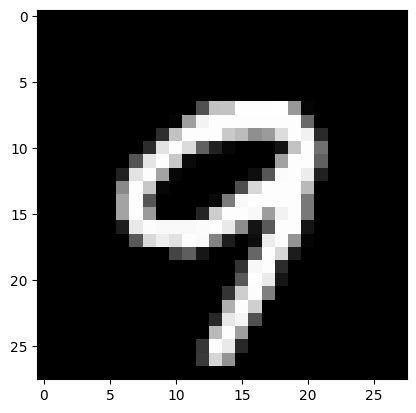

[3 3 3 3 3 3 3 3 3 3]
0


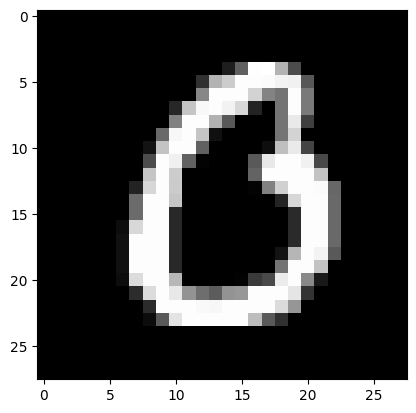

[3 3 3 3 3 3 1 3 3 3]
9


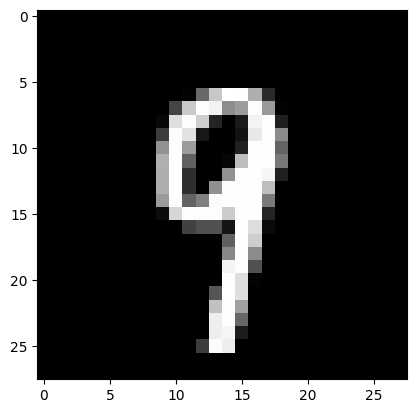

[3 3 1 3 3 3 7 3 7 3]
1


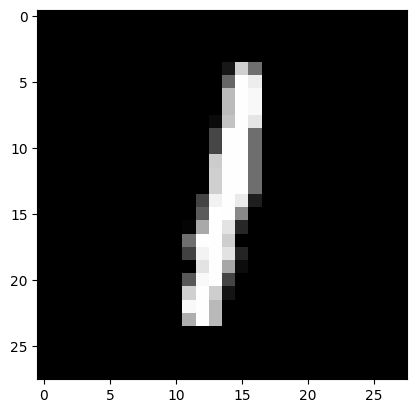

In [405]:
test_predictions(99,parameters,X_train,Y_train)
test_predictions(51,parameters,X_dev,Y_dev)
test_predictions(40,parameters,X_train,Y_train)
test_predictions(104,parameters,X_dev,Y_dev)

In [397]:
dev_predictions = make_predictions(parameters,X_dev) 
check_accuracy(dev_predictions,Y_dev)

[8 2 3 ... 1 7 1] [8 2 3 ... 1 7 1]


np.float64(0.8873809523809524)

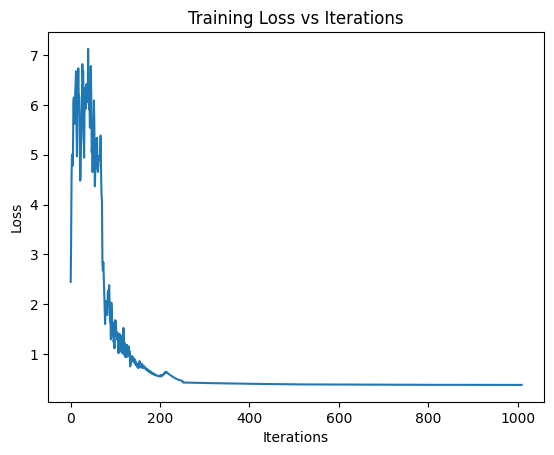

In [398]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss vs Iterations")
plt.show()


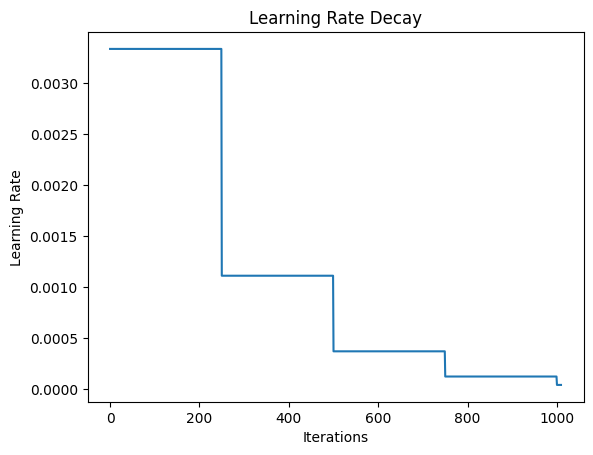

In [399]:
plt.figure()
plt.plot(lrs)
plt.xlabel("Iterations")
plt.ylabel("Learning Rate")
plt.title("Learning Rate Decay")
plt.show()


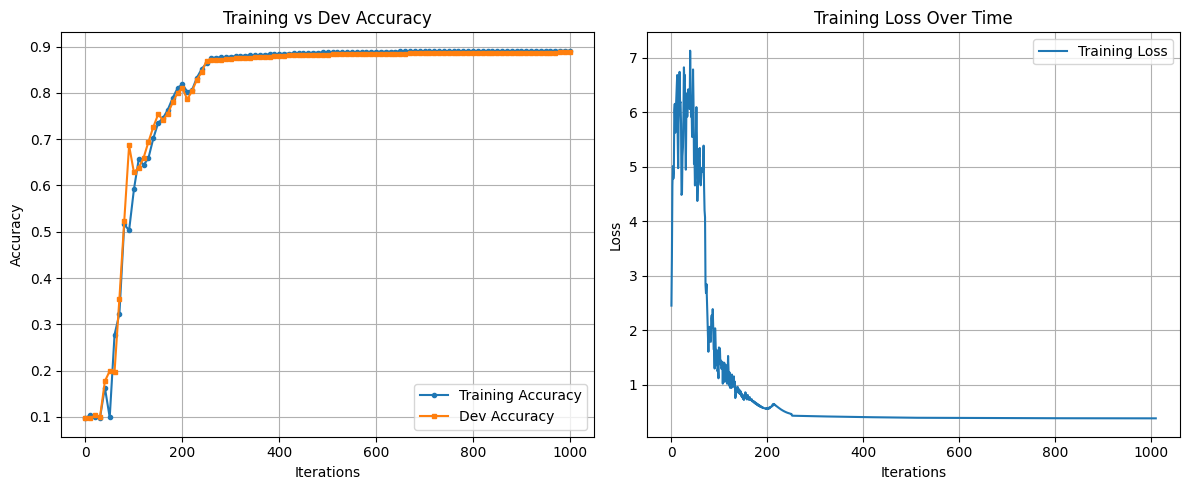

In [400]:
# Plot accuracies
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(0, iterations, 10), train_accuracy, label='Training Accuracy', marker='o', markersize=3)
plt.plot(range(0, iterations, 10), dev_accuracy, label='Dev Accuracy', marker='s', markersize=3)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Training vs Dev Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

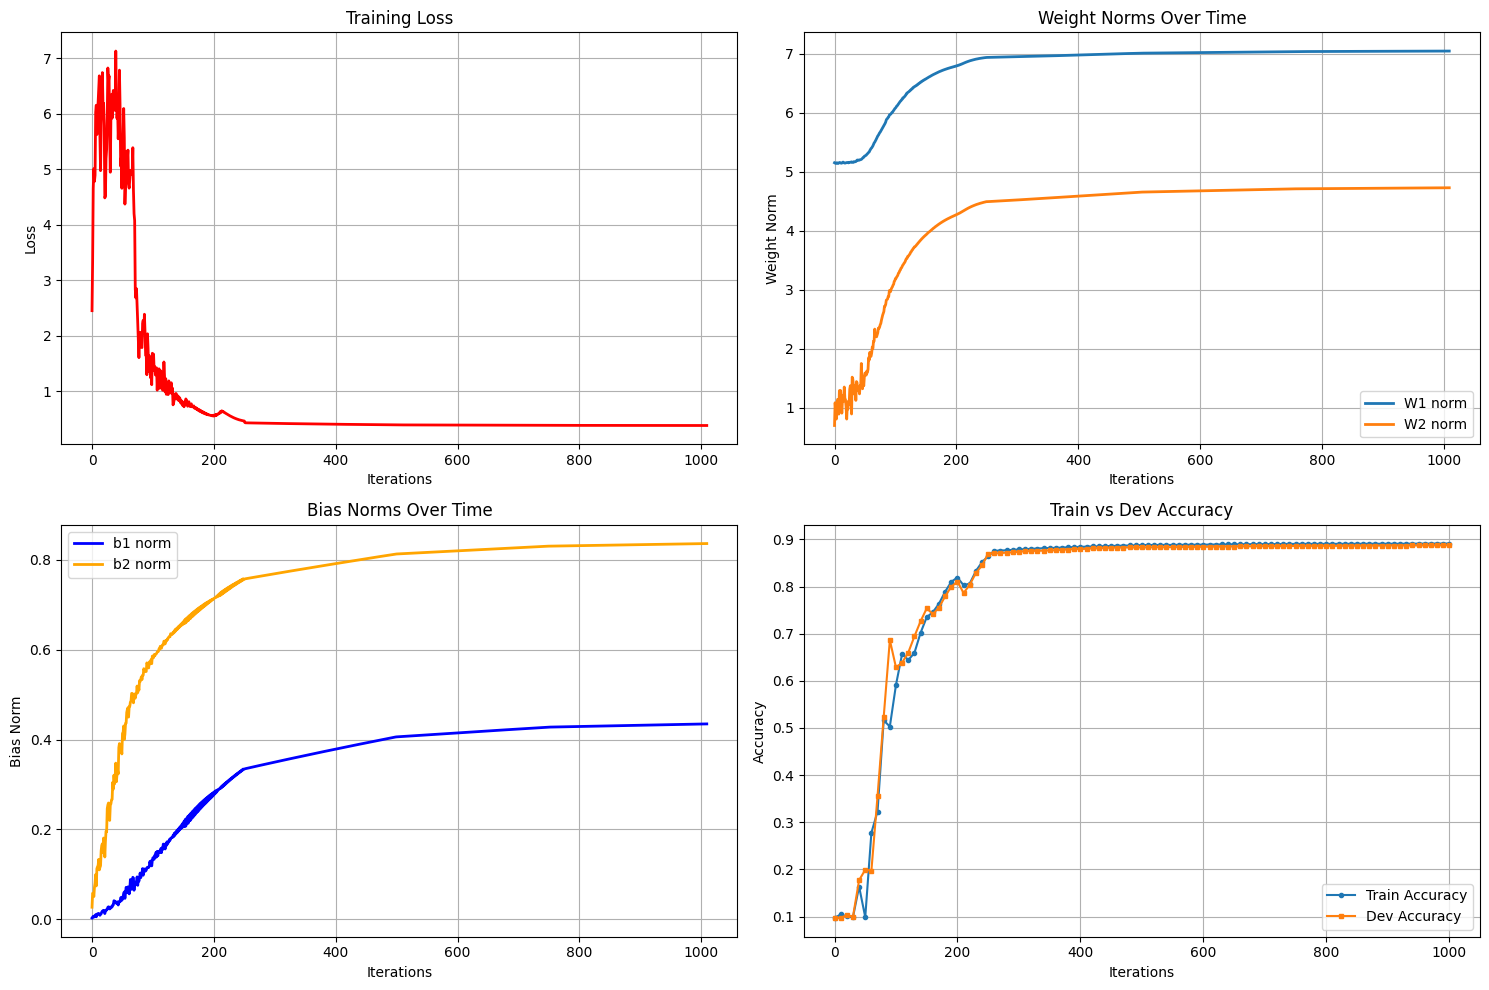

In [401]:
# Plot
# import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Loss
axes[0, 0].plot(losses, color='red', linewidth=2)
axes[0, 0].set_xlabel('Iterations')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_title('Training Loss')
axes[0, 0].grid(True)

# Plot 2: Weight Norms
axes[0, 1].plot(w1_norms, label='W1 norm', linewidth=2)
axes[0, 1].plot(w2_norms, label='W2 norm', linewidth=2)
axes[0, 1].set_xlabel('Iterations')
axes[0, 1].set_ylabel('Weight Norm')
axes[0, 1].set_title('Weight Norms Over Time')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot 3: Bias Norms
# Plot 3: Bias Norms - LINES ONLY
axes[1, 0].plot(b1_norms, label='b1 norm', linewidth=2, color='blue')
axes[1, 0].plot(b2_norms, label='b2 norm', linewidth=2, color='orange')
axes[1, 0].set_xlabel('Iterations')
axes[1, 0].set_ylabel('Bias Norm')
axes[1, 0].set_title('Bias Norms Over Time')
axes[1, 0].legend()
axes[1, 0].grid(True)
axes[1, 0].set_facecolor('white')  # Ensure white background

# Plot 4: Accuracy
axes[1, 1].plot(range(0, iterations, 10), train_accuracy, label='Train Accuracy', marker='o', markersize=3)
axes[1, 1].plot(range(0, iterations, 10), dev_accuracy, label='Dev Accuracy', marker='s', markersize=3)
axes[1, 1].set_xlabel('Iterations')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_title('Train vs Dev Accuracy')
axes[1, 1].legend()
axes[1, 1].grid(True)


plt.tight_layout()
plt.show()

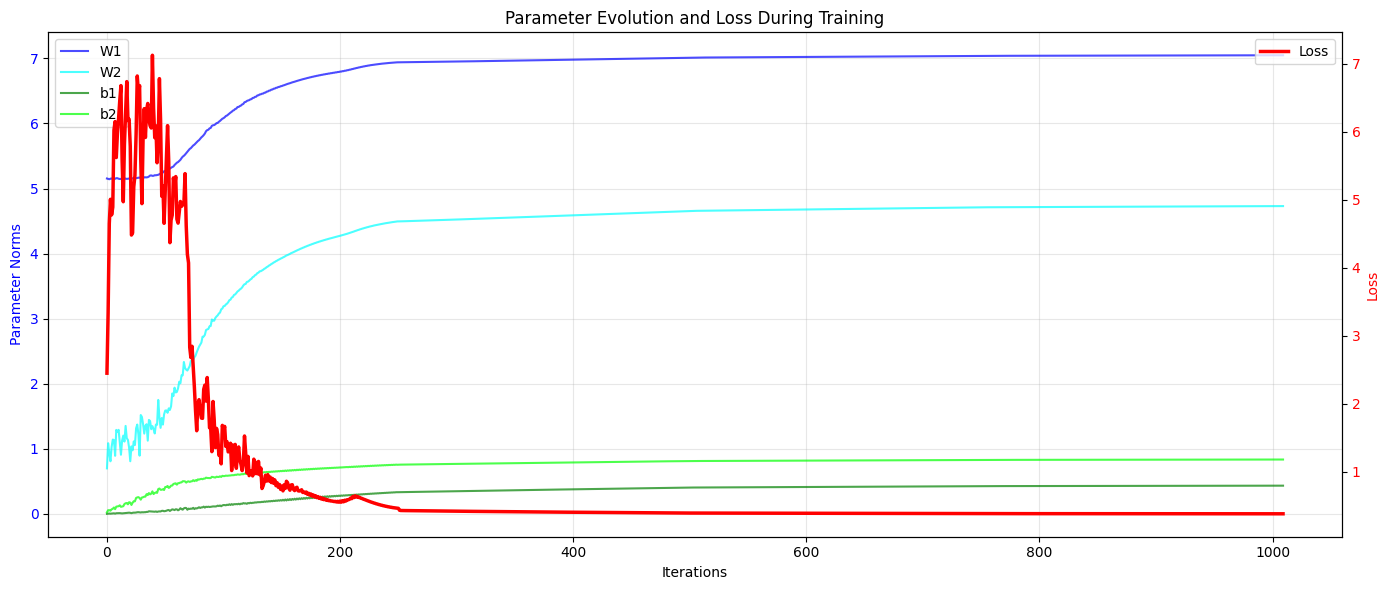

In [402]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Weights and Biases on left y-axis
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Parameter Norms', color='blue')
ax1.plot(w1_norms, label='W1', color='blue', alpha=0.7)
ax1.plot(w2_norms, label='W2', color='cyan', alpha=0.7)
ax1.plot(b1_norms, label='b1', color='green', alpha=0.7)
ax1.plot(b2_norms, label='b2', color='lime', alpha=0.7)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3)

# Loss on right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Loss', color='red')
ax2.plot(losses, label='Loss', color='red', linewidth=2.5)
ax2.tick_params(axis='y', labelcolor='red')
ax2.legend(loc='upper right')

plt.title('Parameter Evolution and Loss During Training')
plt.tight_layout()
plt.show()